# South China Pole Compilation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
from mpl_toolkits.basemap import Basemap
pd.set_option('display.max_rows',500)

## Version 1

No averaging of poles.

### Poles

The following post-late Paleozoic poles were taken from the compilation in Wu et al. (2017), Table 1:

In [2]:
Wu2017_df = pd.read_csv('Wu2017a_SouthChina.csv')

The following Silurian pole was taken from Huang et al. (2000):

In [3]:
Huang2000_lat = 14.9
Huang2000_lon = 196.1
Huang2000_a95 = 5.1
Huang2000_age = 430
Huang2000_ref = 'Huang et al. (2000)'
Huang2000_loc = 'Leijitun Section'

The following late Ordovician pole was taken from Han et al. (2015):

In [4]:
Han2015_lat = -45.8
Han2015_lon = 191.3
Han2015_a95 = np.sqrt(4.2 * 2.4)
Han2015_age = 456
Han2015_ref = 'Han et al. (2015)'
Han2015_loc = 'Pagoda Formation'

The following middle Cambrian pole was taken from Yang et al. (2004):

In [5]:
Yang2004_lat = -51.3
Yang2004_lon = 166.0
Yang2004_a95 = np.sqrt(4.4 * 8.6)
Yang2004_age = 510
Yang2004_ref = 'Yang et al. (2004)'
Yang2004_loc = 'Douposi Formation'

The following Ediacaran pole was taken from Macouin et al. (2004):

In [6]:
Macouin2004_lat = 0.6
Macouin2004_lon = 196.9
Macouin2004_a95 = np.sqrt(4.5 * 9.0)
Macouin2004_age = 584
Macouin2004_ref = 'Macouin et al. (2004)'
Macouin2004_loc = 'Doushantuo Formation'

The following poles were taken from the compilation in Zhang et al. (2015), Table 2:

note:
* ages are approximated based on the period/epoch provided in the table
* '?' indicate references that are unavailable

In [7]:
Zhang2015_df = pd.DataFrame({'lat':[65.3,47.5,45.4,36.1,-29.5,-38.4,23.9],
                             'lon':[265.2,229.1,234.1,231.4,227.1,154.9,187.0],
                             'a95':[np.sqrt(8.1*4.2),np.sqrt(9.6*4.8),np.sqrt(6.6*3.3),np.sqrt(12.5*6.5),6.3,
                                    np.sqrt(14.2*7.4),np.sqrt(3.0*1.8)],
                             'age':[290,340,370,400,460,480,580],
                             'reference':['Wu et al. (1998)','Zhang et al. (2001)','Zhang et al. (2001)',
                                          'Zhang et al. (2001)','Zhang et al. (2012)','Wu et al. (1998)',
                                          'Zhang et al. (2015)'],
                             'formation/lithology/location':['Limestone; Xingshan, Hubei','?','?','?',
                                                             '?','Limestone; Xingshan, Hubei','Doushantuo Formation']})

The following Neoproterozoic poles were taken from the compilation in Zhang et al. (2013), Table 2, with the age of the Xiaofeng dykes modified according to Wang et al. (2016):

In [8]:
Zhang2013_df = pd.DataFrame({'lat':[9.3,0.2,3.4,13.9,2.2,13.5],
                             'lon':[165.9,151.2,163.6,165.3,153.4,91],
                             'a95':[4.3,np.sqrt(7.5*5.4),np.sqrt(2.7*2.1),np.sqrt(9.6*7.0),np.sqrt(13.1*9.4),
                                    np.sqrt(11.3*10.5)],
                             'age':[636,636,748,748,748,821],
                             'reference':['Zhang et al. (2013)','Zhang and Piper (1997)','Evans et al. (2000)',
                                          'Evans et al. (2000)','Zhang and Piper (1997)','Li et al. (2004)'],
                             'formation/lithology/location':['Nantuo Formation','Nantuo Formation','Liantuo Formation',
                                                             'Liantuo Formation','Chengjiang Formation',
                                                             'Xiaofeng Dykes']})

Compile all the poles into a master dataframe:

In [9]:
compiled = Zhang2013_df.copy()
compiled = compiled.append(Zhang2015_df, ignore_index=True)
j = len(compiled.index)

for i in range(len(Wu2017_df.index)):
    if np.isfinite(Wu2017_df['lonP_IFcorr'][i]):
        compiled.loc[j, 'lat'] = Wu2017_df['latP_IFcorr'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP_IFcorr'][i]
    else:
        compiled.loc[j, 'lat'] = Wu2017_df['latP'][i]
        compiled.loc[j, 'lon'] = Wu2017_df['lonP'][i]
    compiled.loc[j, 'a95'] = Wu2017_df['a95'][i]
    compiled.loc[j, 'age'] = Wu2017_df['Age (Ma)'][i]
    compiled.loc[j, 'reference'] = Wu2017_df['Reference'][i]
    compiled.loc[j, 'formation/lithology/location'] = Wu2017_df['Host rock lithology, location'][i]
    j = j + 1
    
compiled.loc[j, 'lat'] = Huang2000_lat
compiled.loc[j, 'lon'] = Huang2000_lon
compiled.loc[j, 'a95'] = Huang2000_a95
compiled.loc[j, 'age'] = Huang2000_age
compiled.loc[j, 'reference'] = Huang2000_ref
compiled.loc[j, 'formation/lithology/location'] = Huang2000_loc
j = j + 1

compiled.loc[j, 'lat'] = Han2015_lat
compiled.loc[j, 'lon'] = Han2015_lon
compiled.loc[j, 'a95'] = Han2015_a95
compiled.loc[j, 'age'] = Han2015_age
compiled.loc[j, 'reference'] = Han2015_ref
compiled.loc[j, 'formation/lithology/location'] = Han2015_loc
j = j + 1

compiled.loc[j, 'lat'] = Yang2004_lat
compiled.loc[j, 'lon'] = Yang2004_lon
compiled.loc[j, 'a95'] = Yang2004_a95
compiled.loc[j, 'age'] = Yang2004_age
compiled.loc[j, 'reference'] = Yang2004_ref
compiled.loc[j, 'formation/lithology/location'] = Yang2004_loc
j = j + 1

compiled.loc[j, 'lat'] = Macouin2004_lat
compiled.loc[j, 'lon'] = Macouin2004_lon
compiled.loc[j, 'a95'] = Macouin2004_a95
compiled.loc[j, 'age'] = Macouin2004_age
compiled.loc[j, 'reference'] = Macouin2004_ref
compiled.loc[j, 'formation/lithology/location'] = Macouin2004_loc
j = j + 1

compiled.sort_values('age', inplace=True)
compiled.reset_index(inplace=True, drop=True)

### Plots

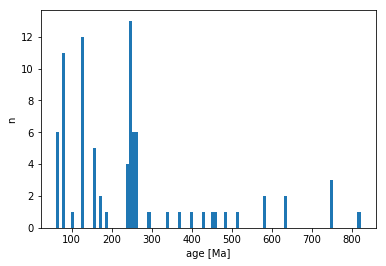

In [10]:
fig, ax = plt.subplots()
ax.hist(compiled['age'], bins=100)
ax.set_xlabel('age [Ma]')
ax.set_ylabel('n')
plt.show(fig)

/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


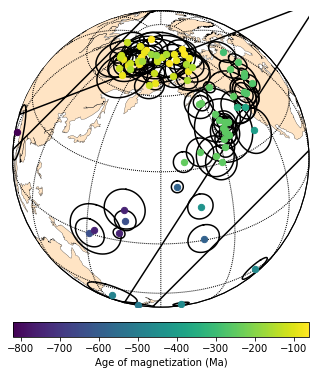

In [11]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=180,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for i in range(len(compiled.index)):
     m = ipmag.plot_pole_colorbar(pmap,
                                 compiled['lon'][i],
                                 compiled['lat'][i],
                                 compiled['a95'][i],
                                 -compiled['age'][i],
                                 -np.max(compiled['age']),
                                 -np.min(compiled['age']),
                                 markersize=40, color="k", alpha=1)       

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

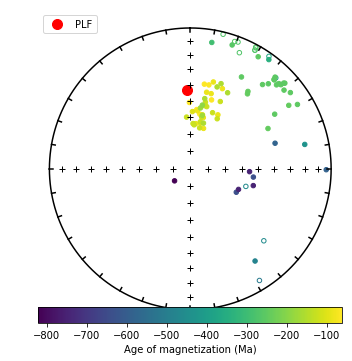

In [12]:
# approximately the mean coordinates of all sites on the E side of the mountains
slat = 27.9
slon = 108.8

# convert pole position to a direction at our Banxi sites
decs = np.array([])
incs = np.array([])
for i in range(len(compiled.index)):
    dec, inc = pmag.vgp_di(compiled['lat'][i], compiled['lon'][i], slat, slon)
    decs = np.append(decs, dec)
    incs = np.append(incs, inc)

# add to dataframe
compiled['dec'] = np.round(decs,1)
compiled['inc'] = np.round(incs,1)
        
# plot using a colormap
color_inds = (-compiled['age']+np.max(compiled['age']))/\
             (np.max(compiled['age'])-np.min(compiled['age']))
colors = [mpl.cm.viridis(i) for i in color_inds]
fig = plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(dec=decs,inc=incs,color=colors)

# PLF
s_igrf = ipmag.igrf([2017.5, 1, slat, slon])
ipmag.plot_di(dec=s_igrf[0],inc=s_igrf[1],color='r',markersize=100,legend='yes',label='PLF')

# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-np.max(compiled['age']), vmax=-np.min(compiled['age']))
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

plt.show(fig)

### Dataframe

In [13]:
# reorder columns
cols = ['age','formation/lithology/location','lat','lon','a95','dec','inc','reference']
compiled = compiled[cols]

# round a95 column
compiled['a95'] = np.round(compiled['a95'],1)

# show
compiled

,age,formation/lithology/location,lat,lon,a95,dec,inc,reference
0,61.0,Sandstone; Hunan,86.1,99.2,4.4,359.2,51.1,Sun et al. (2006)
1,61.0,Sandstone; Guangxi,80.6,141.3,8.5,6.2,55.2,Zhao et al. (1994)
2,61.0,Sediments; Hunan,79.6,231.3,5.6,9.5,38.9,Bowen et al. (2002)
3,61.0,Sediments; Jiangxi,77.2,223.7,3.5,12.5,38.9,Clyde et al. (2008)
4,61.0,Sandstone; Yunnan,74.9,191.9,6.5,17.1,47.5,Yoshioka et al. (2003)
5,66.0,Sandstone; Anhui,76.7,144.9,6.7,9.9,57.7,Gilder et al. (1999)
6,80.0,Dykes; Hongkong,69.3,211.2,8.9,21.8,38.6,Li et al. (2005)
7,83.3,Redbeds; Jiangxi,74.4,225.1,5.2,14.9,36.4,Wang and Yang (2007)
8,83.3,Redbed; Hunan,71.9,124.7,4.0,6.9,63.5,Zhu et al. (2006)
9,83.3,Sandstone; Guandong,70.8,137.1,8.0,12.6,62.8,Morinaga and Liu (2004)


## Version 2

Averaging of poles, taken from Zhang et al. (2015).

### Poles

In [14]:
Zhang2015_compiled = pd.read_csv('Zhang2015b_SouthChina.csv')

### Plots

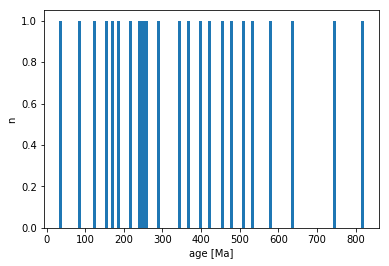

In [15]:
fig, ax = plt.subplots()
ax.hist(Zhang2015_compiled['age'], bins=100)
ax.set_xlabel('age [Ma]')
ax.set_ylabel('n')
plt.show(fig)

/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/yuempark/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


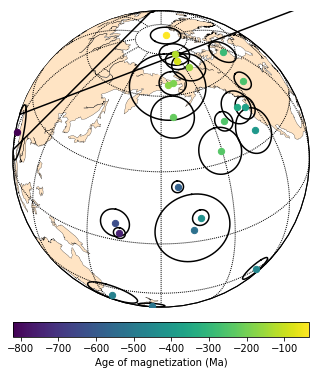

In [16]:
# initiate the figure
plt.figure(figsize=(6, 6))
pmap = Basemap(projection='ortho',lat_0=35,lon_0=180,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))

# Loop through the uploaded data and use the plot_pole_colorbar function
# (instead of plot_pole) to plot the individual poles. The input of this
# function is very similar to that of plot_pole but has the additional
# arguments of (1)AGE, (2)MINIMUM AND (3)MAXIMUM AGES OF PLOTTED POLES.
# Note that the ages are treated as negative numbers -- this just determines
# the direction of the colorbar.
for i in range(len(Zhang2015_compiled.index)):
     m = ipmag.plot_pole_colorbar(pmap,
                                 Zhang2015_compiled['lon'][i],
                                 Zhang2015_compiled['lat'][i],
                                 Zhang2015_compiled['a95'][i],
                                 -Zhang2015_compiled['age'][i],
                                 -np.max(Zhang2015_compiled['age']),
                                 -np.min(Zhang2015_compiled['age']),
                                 markersize=40, color="k", alpha=1)       

pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

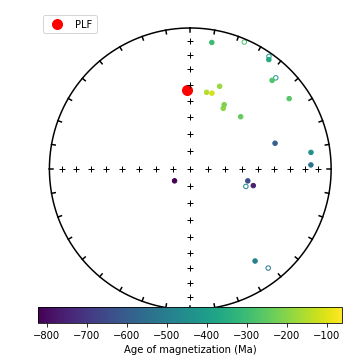

In [17]:
# convert pole position to a direction at our Banxi sites
decs = np.array([])
incs = np.array([])
for i in range(len(Zhang2015_compiled.index)):
    dec, inc = pmag.vgp_di(Zhang2015_compiled['lat'][i], Zhang2015_compiled['lon'][i], slat, slon)
    decs = np.append(decs, dec)
    incs = np.append(incs, inc)

# add to dataframe
Zhang2015_compiled['dec'] = np.round(decs,1)
Zhang2015_compiled['inc'] = np.round(incs,1)
        
# plot using a colormap
color_inds = (-Zhang2015_compiled['age']+np.max(Zhang2015_compiled['age']))/\
             (np.max(Zhang2015_compiled['age'])-np.min(Zhang2015_compiled['age']))
colors = [mpl.cm.viridis(i) for i in color_inds]
fig = plt.figure(num=0,figsize=(5,5))
ipmag.plot_net(0)
ipmag.plot_di(dec=decs,inc=incs,color=colors)

# PLF
s_igrf = ipmag.igrf([2017.5, 1, slat, slon])
ipmag.plot_di(dec=s_igrf[0],inc=s_igrf[1],color='r',markersize=100,legend='yes',label='PLF')

# add the colorbar (note that this colorbar is not tied to the scatter above - it is manually created)
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=-np.max(compiled['age']), vmax=-np.min(compiled['age']))
cax = inset_axes(plt.gca(), width='100%', height='5%', loc=8)
cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='horizontal')
cbar.set_label('Age of magnetization (Ma)')

plt.show(fig)